In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url:"https://raw.githubusercontent.com/Godday-Abuede/Project2RiotGamesData/Cummings_branch/Resources/Crime%20Information.csv"

In [3]:
crime_df= pd.read_csv("https://raw.githubusercontent.com/Godday-Abuede/Project2RiotGamesData/Cummings_branch/Resources/Crime%20Information.csv")

In [4]:
crime_df.head()

,NEIGHBORHOOD_NAME,HOMICIDE,SEX_OFFENSE,ROBBERY,ASSAULT,BURGLARY,VICE,THEFT,VEH_THEFT,OTHER,Lat,Long
0,ANCAROWS LANDING,0,0,0,0,0,7,3,0,25,37.5190,-77.4208
1,BEAUFONT,0,0,0,8,4,1,7,4,58,37.5108,-77.5118
2,BELLE AND MAYO ISLANDS,0,2,1,1,0,8,7,2,48,37.5306,-77.4516
3,BELLEMEADE,0,2,6,92,33,36,89,25,351,37.4990,-77.4386
4,BELLEVUE,0,1,0,5,3,0,63,4,59,37.5908,-77.4576


In [5]:
# Start the index column from 1 not zero
crime_df.index += 1
# reset index
crime_df.reset_index(drop=False, inplace=True)
# Name the index column as id
crime_df.rename(columns={'index':'id'}, inplace=True)
crime_df.head()

,id,NEIGHBORHOOD_NAME,HOMICIDE,SEX_OFFENSE,ROBBERY,ASSAULT,BURGLARY,VICE,THEFT,VEH_THEFT,OTHER,Lat,Long
0,1,ANCAROWS LANDING,0,0,0,0,0,7,3,0,25,37.5190,-77.4208
1,2,BEAUFONT,0,0,0,8,4,1,7,4,58,37.5108,-77.5118
2,3,BELLE AND MAYO ISLANDS,0,2,1,1,0,8,7,2,48,37.5306,-77.4516
3,4,BELLEMEADE,0,2,6,92,33,36,89,25,351,37.4990,-77.4386
4,5,BELLEVUE,0,1,0,5,3,0,63,4,59,37.5908,-77.4576


In [6]:
# Create a filtered dataframe column_list

In [7]:
crime_cols = ["id", "NEIGHBORHOOD_NAME", "SEX_OFFENSE", "ASSAULT", "BURGLARY", "VICE", "THEFT", "OTHER"]
crime_df_transformed= crime_df[crime_cols].copy()

# Rename the column headers
crime_df_transformed = crime_df_transformed.rename(columns={"id": "Id",
                                                          "NEIGHBORHOOD_NAME": "Neighborhood Name",
                                                 "SEX_OFFENSE": "Sex Offense",
                                                   "ASSAULT": "Assault",
                                                           "BURGLARY": "Burglary",
                                                          "VICE": "Vice",
                                                          "THEFT": "Theft",
                                                          "OTHER": "Other Crimes" })

# Clean the data by dropping duplicates and setting the index
crime_df_transformed.drop_duplicates("Id", inplace=True)
crime_df_transformed.set_index("Id", inplace=True)

crime_df_transformed

,Neighborhood Name,Sex Offense,Assault,Burglary,Vice,Theft,Other Crimes
Id,,,,,,,
1,ANCAROWS LANDING,0,0,0,7,3,25
2,BEAUFONT,0,8,4,1,7,58
3,BELLE AND MAYO ISLANDS,2,1,0,8,7,48
4,BELLEMEADE,2,92,33,36,89,351
5,BELLEVUE,1,5,3,0,63,59
...,...,...,...,...,...,...,...
139,WINDSOR,0,8,4,0,22,46
140,WOODHAVEN,2,18,9,2,26,68
141,WOODLAND HEIGHTS,1,23,13,7,83,141


In [8]:
# Create a column to hold the sum of values of each row

In [15]:
column_list = list(crime_df_transformed)
crime_df_transformed["Sum"] = crime_df_transformed[column_list].sum(axis=1)
crime_df_transformed.head()

,Neighborhood Name,Sex Offense,Assault,Burglary,Vice,Theft,Other Crimes,Sum
Id,,,,,,,,
1,ANCAROWS LANDING,0,0,0,7,3,25,35
2,BEAUFONT,0,8,4,1,7,58,78
3,BELLE AND MAYO ISLANDS,2,1,0,8,7,48,66
4,BELLEMEADE,2,92,33,36,89,351,603
5,BELLEVUE,1,5,3,0,63,59,131


In [33]:
html_table = crime_df_transformed.to_html()
crime_df_transformed.to_html('table.html')

In [20]:
# selecting rows based on top six Sum of crimes 
rslt_df = crime_df_transformed[crime_df_transformed['Sum'] > 700] 
  
rslt_df

,Neighborhood Name,Sex Offense,Assault,Burglary,Vice,Theft,Other Crimes,Sum
Id,,,,,,,,
54,GILPIN,6,163,9,117,52,538,885
68,JEFF DAVIS,9,111,44,43,182,584,973
80,MIDLOTHIAN,3,88,26,98,178,716,1109
81,MONROE WARD,10,58,4,46,142,472,732
108,SHOCKOE BOTTOM,7,66,4,13,211,425,726
122,THE FAN,14,125,64,28,422,813,1466


In [21]:
# Plot a bar Chart

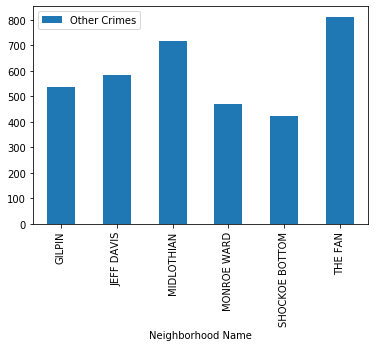

In [49]:
rslt_df.plot(x ='Neighborhood Name', y='Other Crimes', kind = 'bar')
plt.savefig("Images/NeighborhoodNamevsOtherCrimes.png")
plt.show()

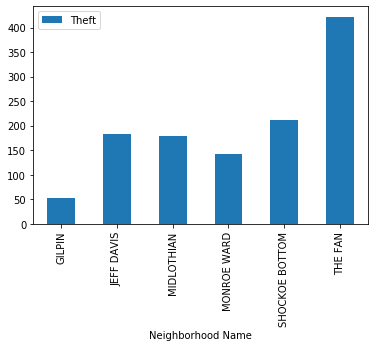

In [50]:
rslt_df.plot(x ='Neighborhood Name', y='Theft', kind = 'bar')
plt.savefig("Images/NeighborhoodNamevsTheft.png")
plt.show()

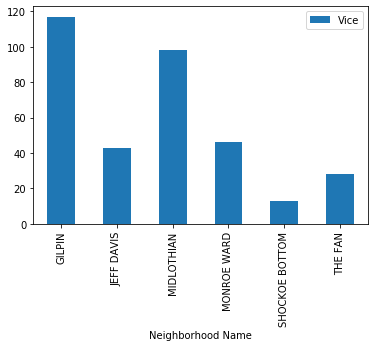

In [51]:
rslt_df.plot(x ='Neighborhood Name', y='Vice', kind = 'bar')
plt.savefig("Images/NeighborhoodNamevsVice.png")
plt.show()

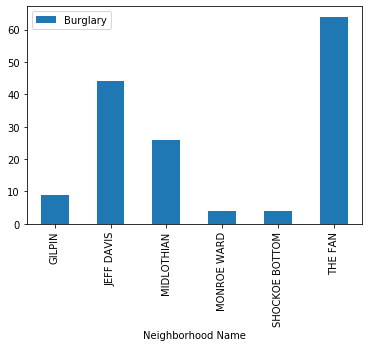

In [52]:
rslt_df.plot(x ='Neighborhood Name', y='Burglary', kind = 'bar')
plt.savefig("Images/NeighborhoodNamevsBurglary.png")
plt.show()

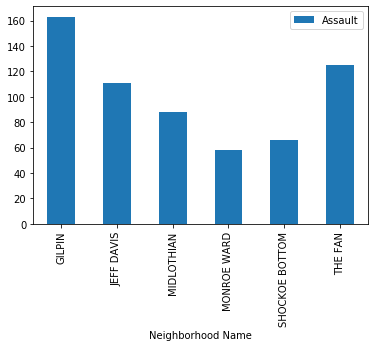

In [53]:
rslt_df.plot(x ='Neighborhood Name', y='Assault', kind = 'bar')
plt.savefig("Images/NeighborhoodNamevsAssault.png")
plt.show()

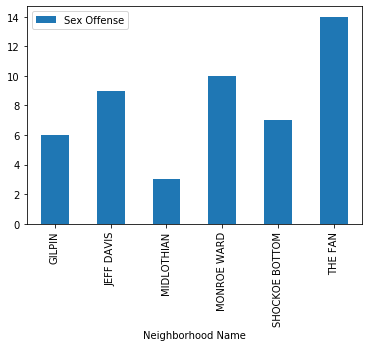

In [54]:
rslt_df.plot(x ='Neighborhood Name', y='Sex Offense', kind = 'bar')
plt.savefig("Images/NeighborhoodNamevsSexOffense.png")
plt.show()

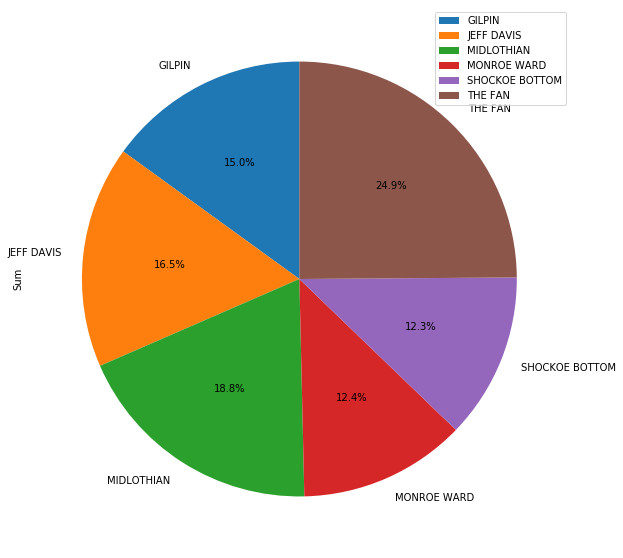

In [46]:
rslt_df.plot.pie(y='Sum',figsize=(10, 10),autopct='%1.1f%%', startangle=90, labels = rslt_df['Neighborhood Name'],)
plt.savefig("Images/NeighborhoodNamevsSumPieChart.png")
plt.show()